<a href="https://colab.research.google.com/github/yastiaisyah/AnalisisDataForensik/blob/main/CH7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

#Load dataset
url = 'https://raw.githubusercontent.com/PacktPublishing/Exploratory-Data-Analysis-with-Python-Cookbook/main/Ch7/Data/SF_Air_Traffic_Passenger_Statistics_Transformed.csv'
air_traffic_data = pd.read_csv(url)
#Inspect first 5 rows and data types of the dataset
air_traffic_data.head()

,Date,Total Passenger Count
0,200601,2448889
1,200602,2223024
2,200603,2708778
3,200604,2773293
4,200605,2829000


In [ ]:
air_traffic_data.shape

(132, 2)

In [ ]:
air_traffic_data.dtypes

Date                     int64
Total Passenger Count    int64
dtype: object

In [ ]:
#Transform date int to date
air_traffic_data['Date']= pd.to_datetime(air_traffic_data['Date'], format = "%Y%m")
air_traffic_data.dtypes

Date                     datetime64[ns]
Total Passenger Count             int64
dtype: object

In [ ]:
#Set date as index
air_traffic_data.set_index('Date',inplace = True)
air_traffic_data.shape

(132, 1)

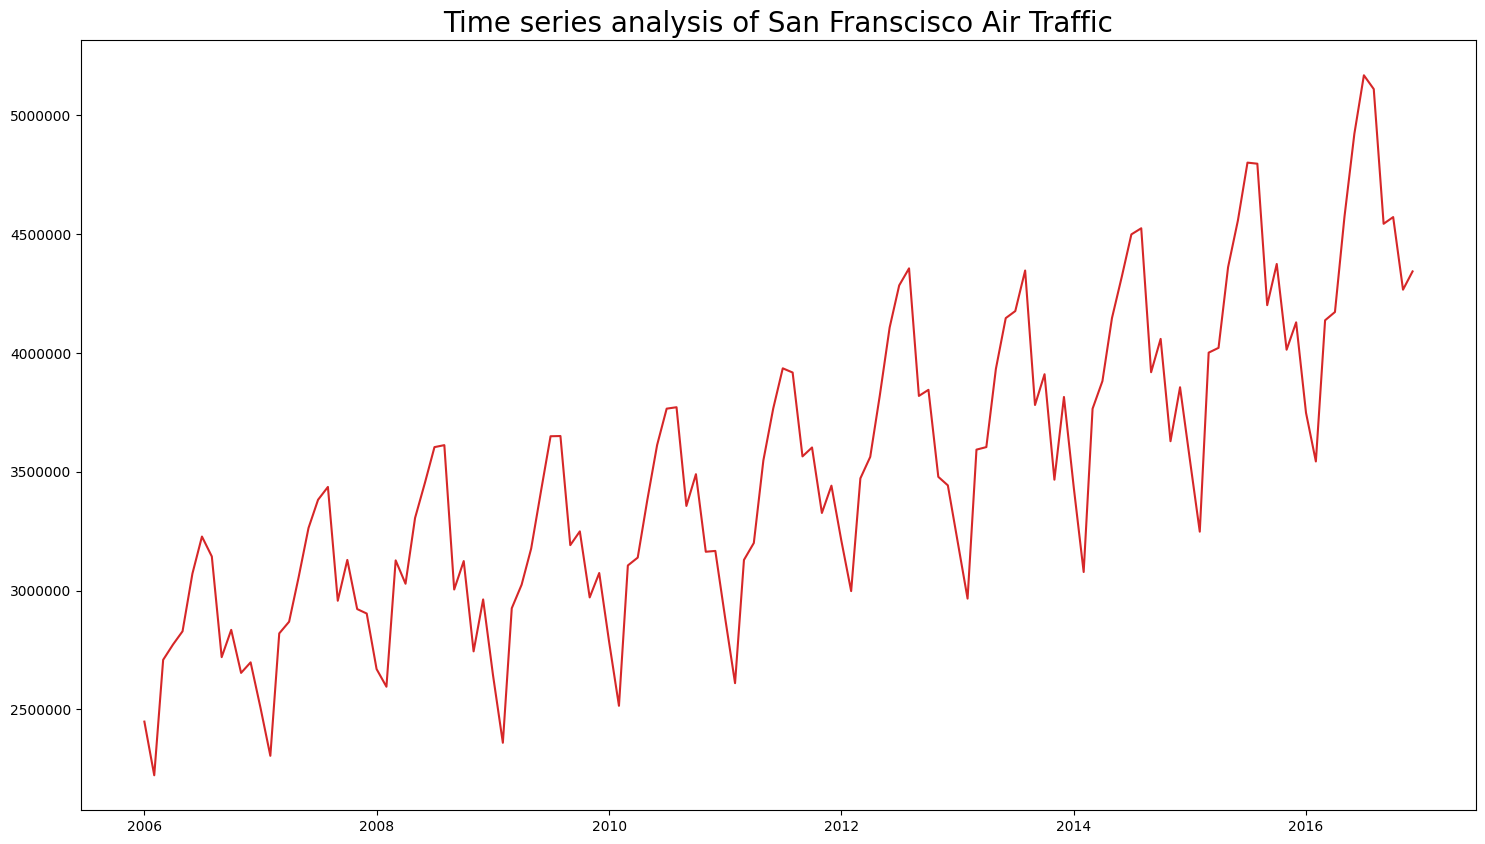

In [ ]:
#Plot time series using line plot
plt.figure(figsize= (18,10))

plt.plot(air_traffic_data.index, air_traffic_data['Total Passenger Count'], color='tab:red')
plt.title("Time series analysis of San Franscisco Air Traffic",fontsize = 20)
plt.ticklabel_format(style='plain', axis='y')

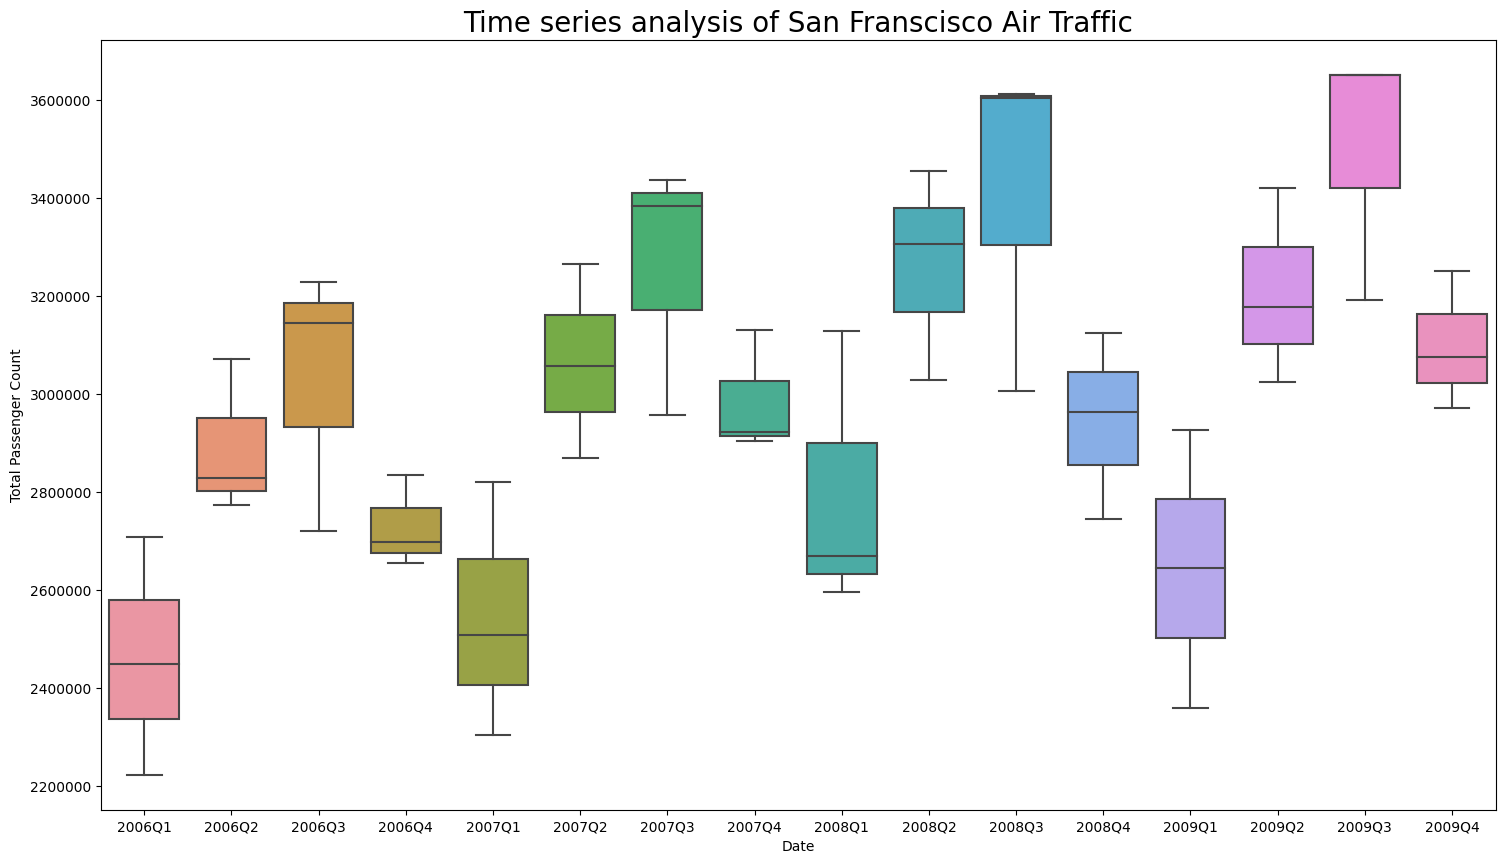

In [ ]:
#Plot time series using boxplot
plt.figure(figsize= (18,10))

data_subset = air_traffic_data[air_traffic_data.index < '2010-01-01']

ax = sns.boxplot(data = data_subset , x= pd.PeriodIndex(data_subset.index, freq='Q'),
                 y= data_subset['Total Passenger Count'])

ax.set_title("Time series analysis of San Franscisco Air Traffic",fontsize = 20)

plt.ticklabel_format(style='plain', axis='y')

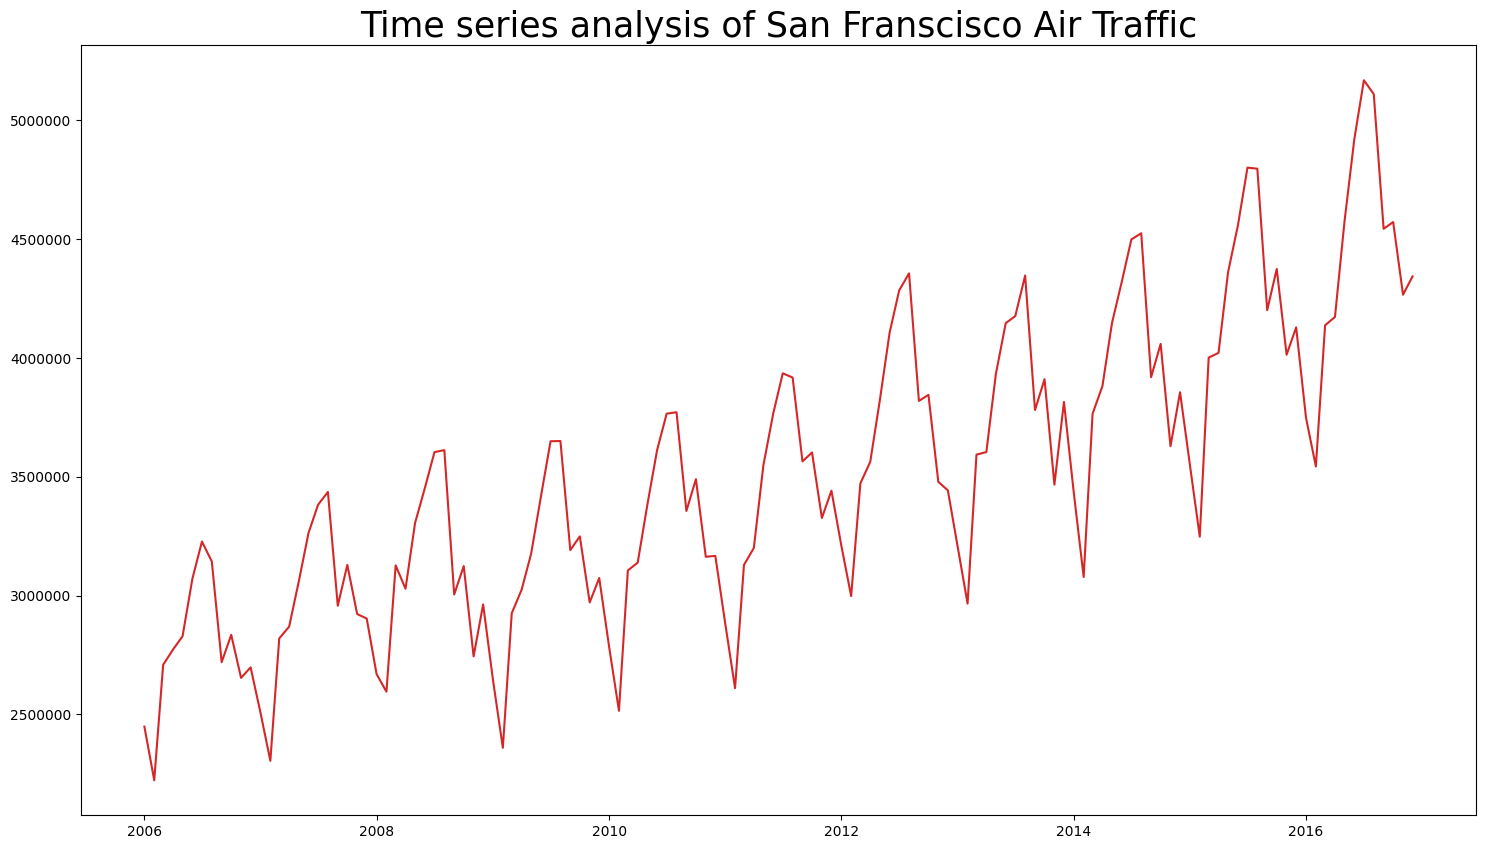

In [ ]:
#Plot time series using line plot
plt.figure(figsize= (18,10))

plt.plot(air_traffic_data['Date'], air_traffic_data['Total Passenger Count'], color='tab:red')
plt.title("Time series analysis of San Franscisco Air Traffic",fontsize = 25)
plt.ticklabel_format(style='plain', axis='y')

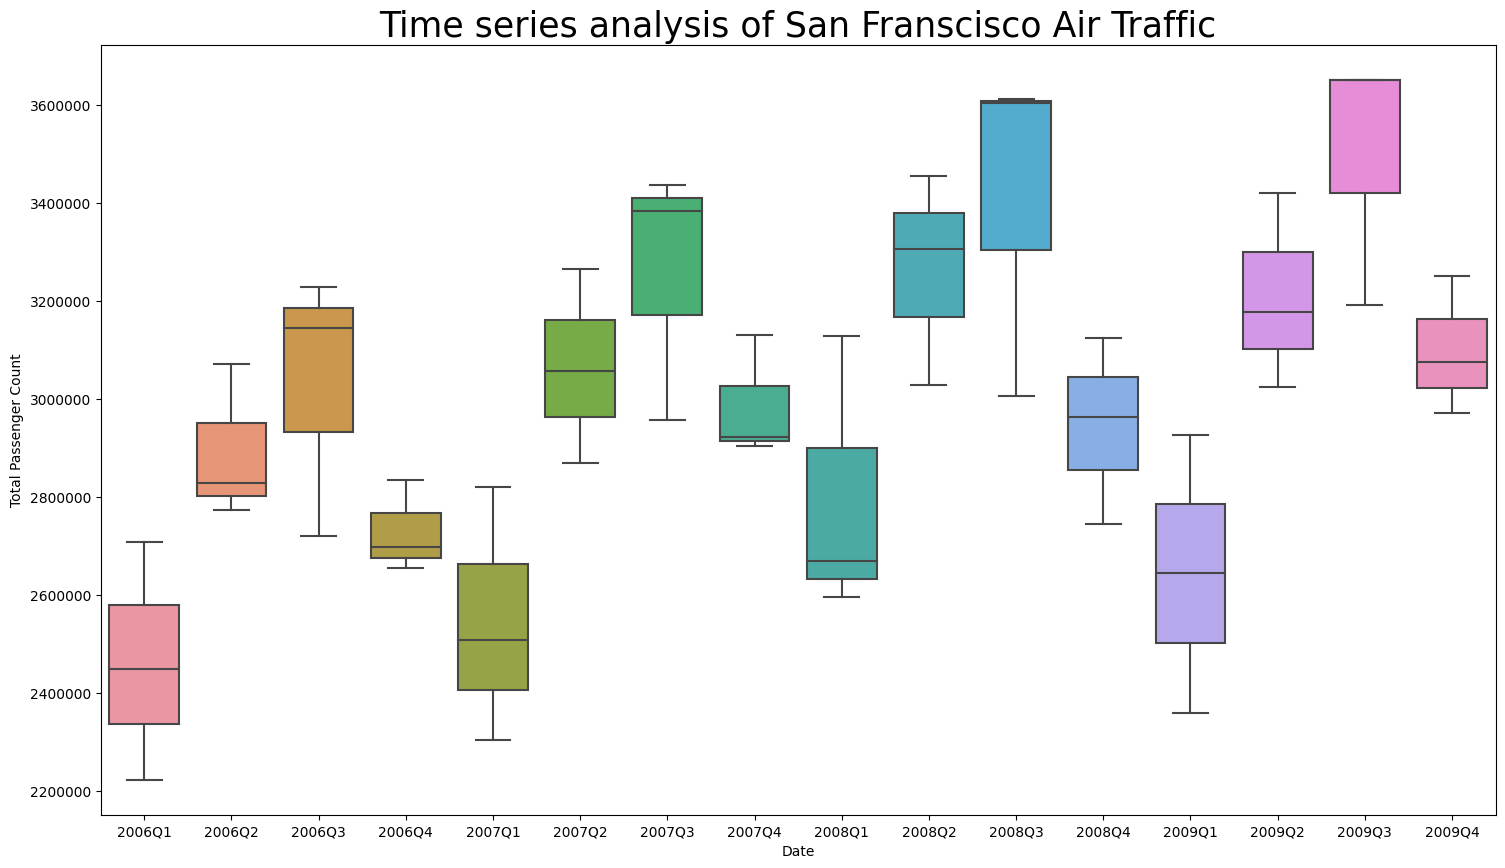

In [ ]:
#Plot time series using boxplot
plt.figure(figsize= (18,10))

data_subset = air_traffic_data[air_traffic_data['Date'] < '2010-01-01']

ax = sns.boxplot(data = data_subset , x= pd.PeriodIndex(data_subset['Date'], freq='Q'), #air_traffic_data['Date'].dt.month,
                 y= data_subset['Total Passenger Count'])

ax.set_title("Time series analysis of San Franscisco Air Traffic",fontsize = 25)

plt.ticklabel_format(style='plain', axis='y')

In [3]:
#Load dataset
url = 'https://raw.githubusercontent.com/PacktPublishing/Exploratory-Data-Analysis-with-Python-Cookbook/main/Ch7/Data/SF_Air_Traffic_Passenger_Statistics_Transformed.csv'
air_traffic_data = pd.read_csv(url)
daily = 'https://raw.githubusercontent.com/PacktPublishing/Exploratory-Data-Analysis-with-Python-Cookbook/main/Ch7/Data/DailyDelhiClimate.csv'
weather_data = pd.read_csv(daily)

#Inspect first 5 rows and data types of the dataset
air_traffic_data.head(2)

,Date,Total Passenger Count
0,200601,2448889
1,200602,2223024


In [4]:
weather_data.head(2)

,date,meantemp
0,01/01/2013,10.0
1,02/01/2013,7.4


In [5]:
air_traffic_data.shape

(132, 2)

In [6]:
weather_data.shape

(1461, 2)

In [7]:
air_traffic_data.dtypes

Date                     int64
Total Passenger Count    int64
dtype: object

In [8]:
weather_data.dtypes

date         object
meantemp    float64
dtype: object

In [9]:
#Transform date column to date data type
air_traffic_data['Date']= pd.to_datetime(air_traffic_data['Date'], format = "%Y%m")
weather_data['date']= pd.to_datetime(weather_data['date'], format = "%d/%m/%Y")
air_traffic_data.dtypes

Date                     datetime64[ns]
Total Passenger Count             int64
dtype: object

In [10]:
weather_data.dtypes

date        datetime64[ns]
meantemp           float64
dtype: object

In [11]:
#Set date as index
air_traffic_data.set_index('Date',inplace = True)
weather_data.set_index('date', inplace = True)
air_traffic_data.shape

(132, 1)

In [12]:
weather_data.shape

(1461, 1)

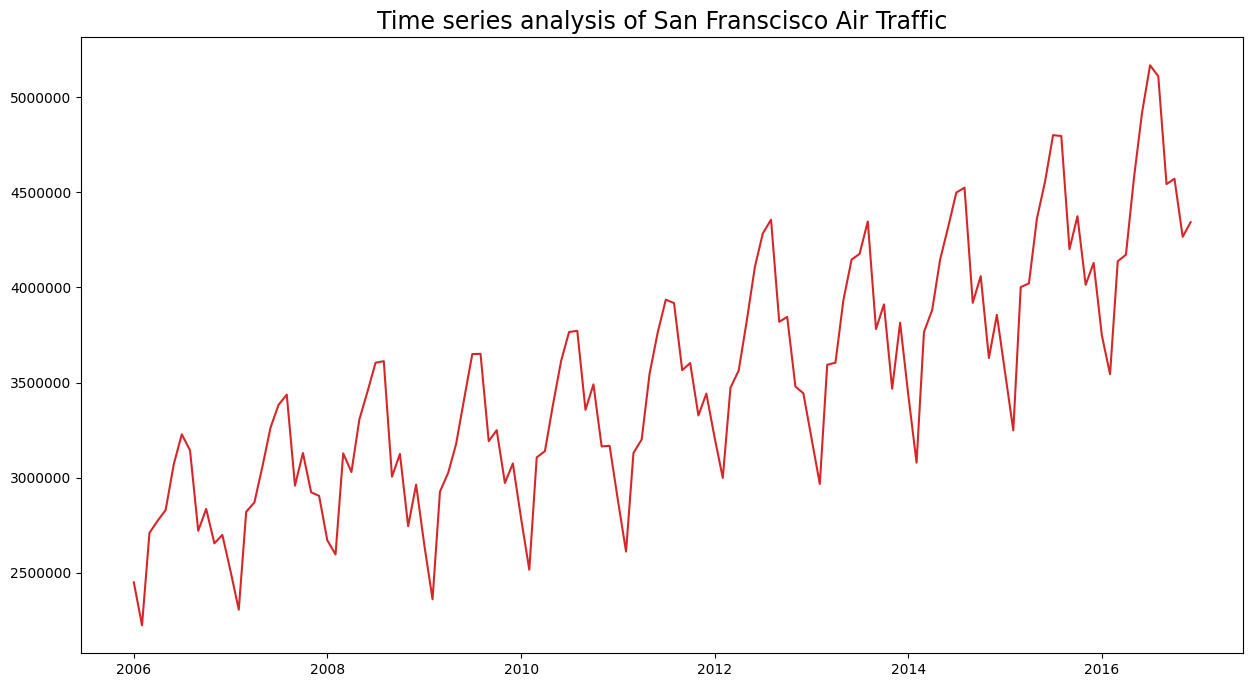

In [13]:
#Plot time series using line plot
plt.figure(figsize= (15,8))

plt.plot(air_traffic_data.index, air_traffic_data['Total Passenger Count'], color='tab:red')
plt.title("Time series analysis of San Franscisco Air Traffic",fontsize = 17)
plt.ticklabel_format(style='plain', axis='y')

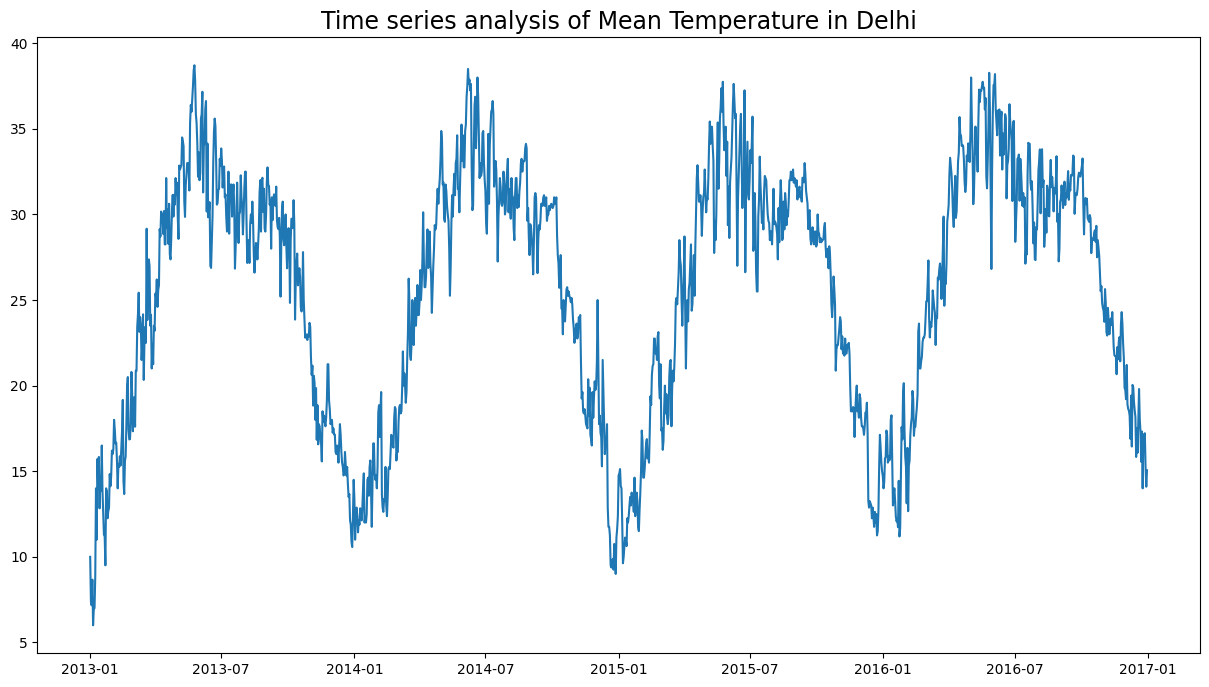

In [14]:
plt.figure(figsize= (15,8))

plt.plot(weather_data.index, weather_data['meantemp'], color='tab:blue')
plt.title("Time series analysis of Mean Temperature in Delhi",fontsize = 17)
plt.ticklabel_format(style='plain', axis='y')

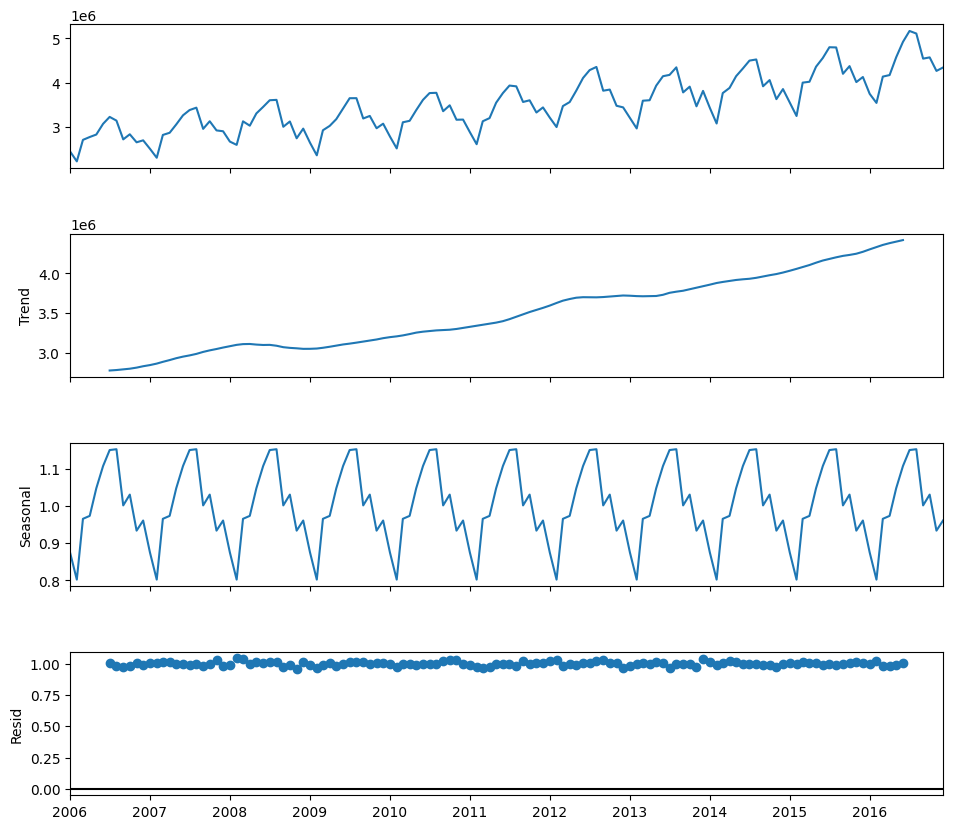

In [15]:
#Decompose Timeseries using Multiplicative model
decomposition_multi = seasonal_decompose(air_traffic_data,
                                              model='multiplicative', period = 12)

fig = decomposition_multi.plot()
fig.set_size_inches((10, 9))
plt.show()

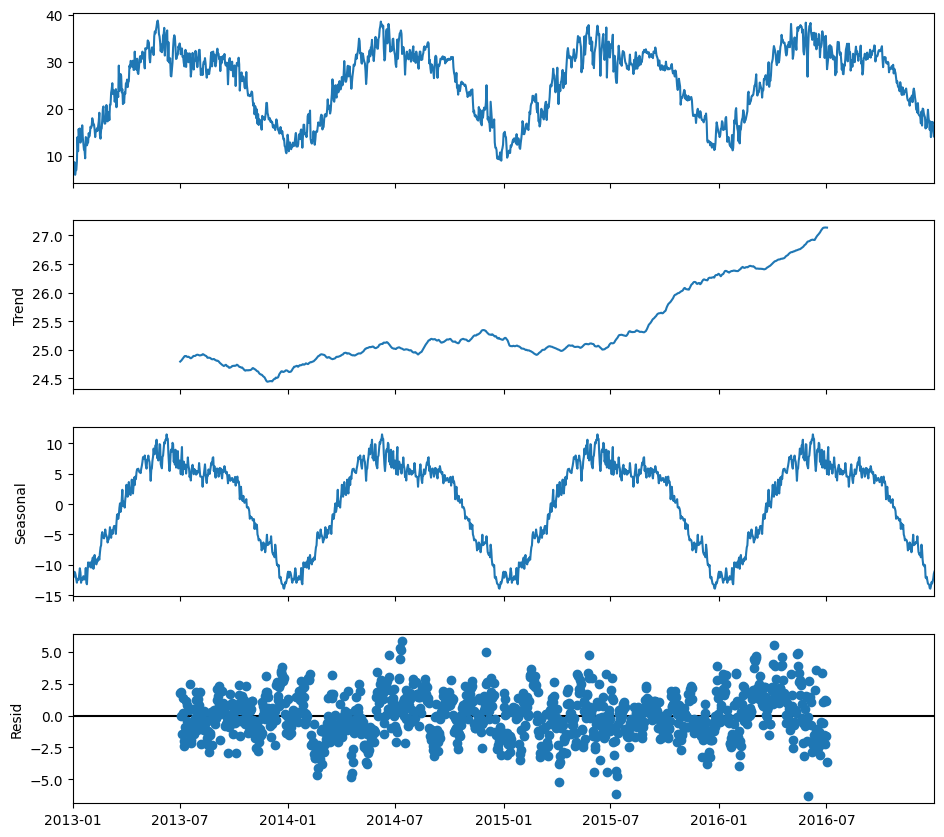

In [16]:
#Decompose Timeseries using Additive model
decomposition_add = seasonal_decompose(weather_data,
                                              model='additive',period = 365)

fig = decomposition_add.plot()
fig.set_size_inches((10, 9))
plt.show()